<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/3_2_Unsupervised_Learning_in_Python_Visualization_with_Hierarchical_Clustering_and_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-2 Unsupervised Learning in Python - Visualization with Hierarchical Clustering and t-SNE

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, normalize

## Data

In [2]:
data_base_url = 'https://drive.google.com/uc?id='
image_base_url = 'https://drive.google.com/uc?export=view&id='

### Eurovision scoring dataset

https://eurovision.tv/history/full-split-results

In [3]:
id = '1rGY7U9BuQrbqh-K03E-lgNT_0Q_100sd'
eurovision = pd.read_csv(data_base_url + id)
eurovision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From country     1066 non-null   object 
 1   To country       1066 non-null   object 
 2   Jury A           1066 non-null   int64  
 3   Jury B           1066 non-null   int64  
 4   Jury C           1066 non-null   int64  
 5   Jury D           1066 non-null   int64  
 6   Jury E           1066 non-null   int64  
 7   Jury Rank        1066 non-null   int64  
 8   Televote Rank    1066 non-null   int64  
 9   Jury Points      420 non-null    float64
 10  Televote Points  420 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 91.7+ KB


### Grain data

In [4]:
data_url = 'https://drive.google.com/uc?id=1-sfcYNfZ3bC2K5AesWHcDiPiqTo1S_ie'
seeds = pd.read_csv(data_url, header=None)
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


### Stock Movement

In [5]:
data_url = 'https://drive.google.com/uc?id=1tcU2IA8NDoWO-0LHbaOSYayB3_Kw7Wlc'
stock_movement = pd.read_csv(data_url)
stock_movement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


In [6]:
stock_movement = stock_movement.rename(columns={stock_movement.columns[0]: 'Company'})
stock_movement.head()

,Company,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


## Visualizing hierarchies

### Visualization communiate insight

- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: Create a 2D map of a dataset
    - Conveys useful imformation about the proximity of the samples to one anther
- **Hierarchical clustering**: Arranges samples into a hierarchy of clusters

### A hierarchy of groups

- Groups of living things can form a hierarchy
- Clusters are contained in one another
- Can organize any sort of data into a hierarchy (not just samples plants and animals)

### Eurovisin scoring

- Countries gave scores to songs performed at the Eurovision 2016
- 2D array of scores

### Dendogram

- Hierarchical clustering of voting customers

<img src='https://drive.google.com/uc?export=view&id=1o7KutSR-JCkQEFJWb2iRoQE_8a9JGKPp'/>


### How does hierarchical clustering work?

- Every country begins in a separate cluster
- At each step, the two closest clusters are merged
- Continue until all countries in a single cluster
- This is called **agglomerative heirarchical clustering**
- The entire process of the clustering is encoded in the dendogram
    - At the bottom, each country is in a cluster of its own
    - The clustering then proceeds from the bottom up
    - Clusters are represented as vertical lines, and joining of vertical lines indicates a merging of clusters

### Hierarchial clustering with `scipy`

- Given `samples` (the array of scores), and `country_names`

```python
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendogram

# the linkage functionm performs the hierarchical clustering
mergings = linkage(samples, method='complete')

dendogram(mergings,
          labels=country_names,
          leaf_rotation=90,
          leaf_font_size=6)
          
plt.show()
```

### How many merges?

- With $n$ data samples, there would be $n - 1$ merges.

## Understanding mergings

The `mergings` array has shape $(n - 1, 4)$ where $n$ is the number of original data points in `samples`

- Column 0: Index of the first cluster being merged
- Column 1: Index of the second cluster being merged
- Column 2: Distance (linkage criterion) between the two merged clusters
- Column 3: Number of original samples (data points) contained in the new cluster after merging

In [7]:
# Example data (4 samples with 2 features each)
samples = np.array([
    [1.0, 2.0], # Index 0
    [1.5, 1.8], # Index 1
    [5.0, 8.0], # Index 2
    [8.0, 8.0]  # Index 3
])

mergings = linkage(samples, method='complete')
mergings

array([[0.        , 1.        , 0.53851648, 2.        ],
       [2.        , 3.        , 3.        , 2.        ],
       [4.        , 5.        , 9.21954446, 4.        ]])

In [8]:
col0 = samples[0]
col1 = samples[1]
col2 = samples[2]
col3 = samples[3]

# Eucliean distance
np.linalg.norm(col0 - col1), np.linalg.norm(col2 - col3)

(0.5385164807134504, 3.0)

In [9]:
cluster4 = samples[0:2]
cluster5 = samples[2:]
cluster4, cluster5

(array([[1. , 2. ],
        [1.5, 1.8]]),
 array([[5., 8.],
        [8., 8.]]))

In [10]:
distance_a1 = np.linalg.norm(cluster4[0] - cluster5[0])
distance_a2 = np.linalg.norm(cluster4[0] - cluster5[1])
distance_b1 = np.linalg.norm(cluster4[1] - cluster5[0])
distance_b2 = np.linalg.norm(cluster4[1] - cluster5[1])
distance_a1, distance_a2, distance_b1, distance_b2

(7.211102550927978, 9.219544457292887, 7.119691004531026, 8.98276126811795)

In [11]:
np.max([distance_a1, distance_a2, distance_b1, distance_b2])

9.219544457292887

In [12]:
# Loop over each point in cluster4
distance_matrix = []
for a in cluster4:
    row_distances = []  # Store distances for this row
    for b in cluster5:
        distance = np.linalg.norm(a - b)  # Compute Euclidean distance
        row_distances.append(distance)   # Append distance to row
    distance_matrix.append(row_distances)  # Append row to matrix

# Convert list of lists to NumPy array
distances = np.array(distance_matrix)

# Compute Complete Linkage distance (maximum distance in matrix)
max_distance = np.max(distances)

# Print results
print("Pairwise Distance Matrix:\n", distances)
print("Complete Linkage Distance:", max_distance)

Pairwise Distance Matrix:
 [[7.21110255 9.21954446]
 [7.119691   8.98276127]]
Complete Linkage Distance: 9.219544457292887


In [13]:
distances = np.array([[np.linalg.norm(a - b) for b in cluster5] for a in cluster4])
distances, np.max(distances)

(array([[7.21110255, 9.21954446],
        [7.119691  , 8.98276127]]),
 9.219544457292887)

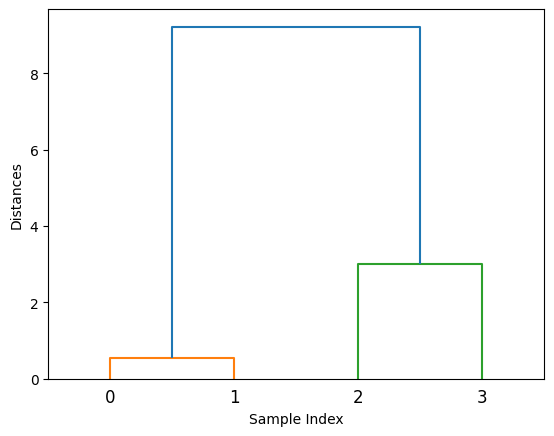

In [14]:
dendrogram(mergings,
           labels=[0, 1, 2, 3],
           leaf_rotation=0,
           leaf_font_size=12)

plt.ylabel('Distances')
plt.xlabel('Sample Index')
plt.show()

- For the indices, the numbers from $0$ to $n - 1$ correspond to the rows in `samples`
- New clusters are assigned starting at $n$, then $n + 1$, etc.
- This continues until all data points are merged into **one final cluster**

### Hierarchical clustering of grain data

In [15]:
X = seeds.iloc[:, 0:-1].to_numpy()
y = seeds.iloc[:, -1].to_numpy()
X.shape, y.shape

((210, 7), (210,))

In [16]:
# easier to view a dendogram with less data
_, samples, _, varieties = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
samples.shape, varieties.shape

((42, 7), (42,))

In [17]:
mapping = {1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}

varieties = np.vectorize(mapping.get)(varieties)
varieties

array(['Kama wheat', 'Canadian wheat', 'Rosa wheat', 'Canadian wheat',
       'Rosa wheat', 'Canadian wheat', 'Rosa wheat', 'Kama wheat',
       'Rosa wheat', 'Rosa wheat', 'Kama wheat', 'Canadian wheat',
       'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Kama wheat',
       'Canadian wheat', 'Kama wheat', 'Canadian wheat', 'Kama wheat',
       'Kama wheat', 'Canadian wheat', 'Rosa wheat', 'Kama wheat',
       'Rosa wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Canadian wheat', 'Kama wheat', 'Canadian wheat', 'Rosa wheat',
       'Kama wheat', 'Canadian wheat', 'Canadian wheat', 'Rosa wheat',
       'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Kama wheat',
       'Canadian wheat', 'Rosa wheat'], dtype='<U14')

In [18]:
mergings = linkage(samples, method='complete')
type(mergings), mergings.shape

(numpy.ndarray, (41, 4))

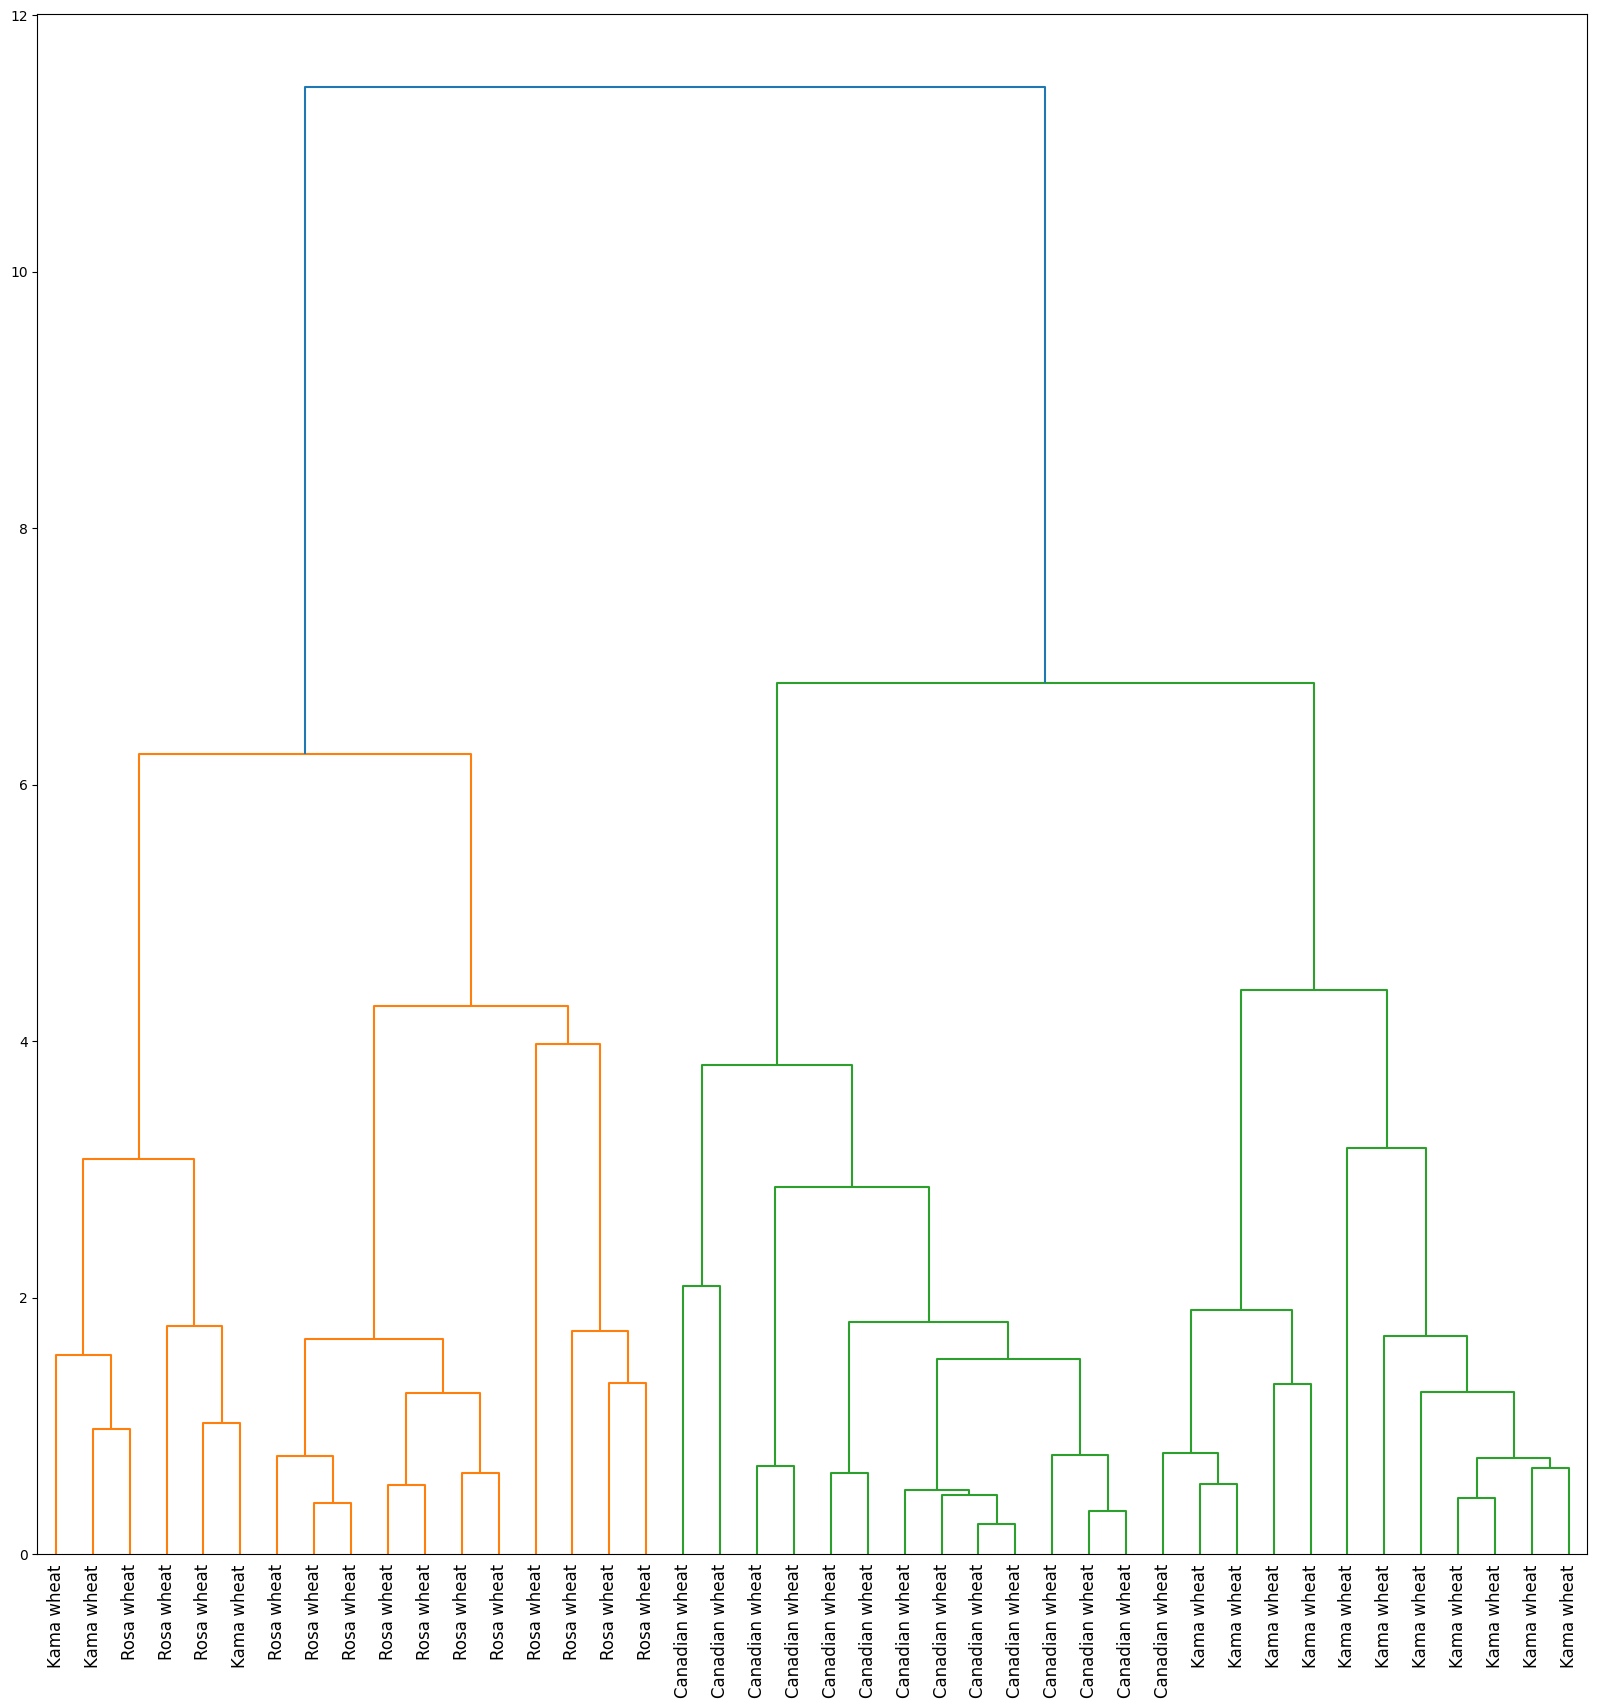

In [19]:
plt.figure(figsize=(20, 20))

dendrogram(
    mergings,
    labels=varieties,
    leaf_rotation=90,
    leaf_font_size=12
)

plt.show()

### Hierarchies of stocks

In [20]:
movements = stock_movement.iloc[:, 1:].to_numpy()
companies = stock_movement['Company'].to_numpy()
movements.shape, companies.shape

((60, 963), (60,))

In [21]:
my_normalizer = Normalizer()
test = my_normalizer.fit_transform(movements)
test

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

In [22]:
normalized_movements = normalize(movements)
normalized_movements

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

In [23]:
# the normalize method is more convenient than
#. creating your own Normalizer
np.sum(test - normalized_movements)

0.0

In [24]:
mergings = linkage(normalized_movements, method='complete')

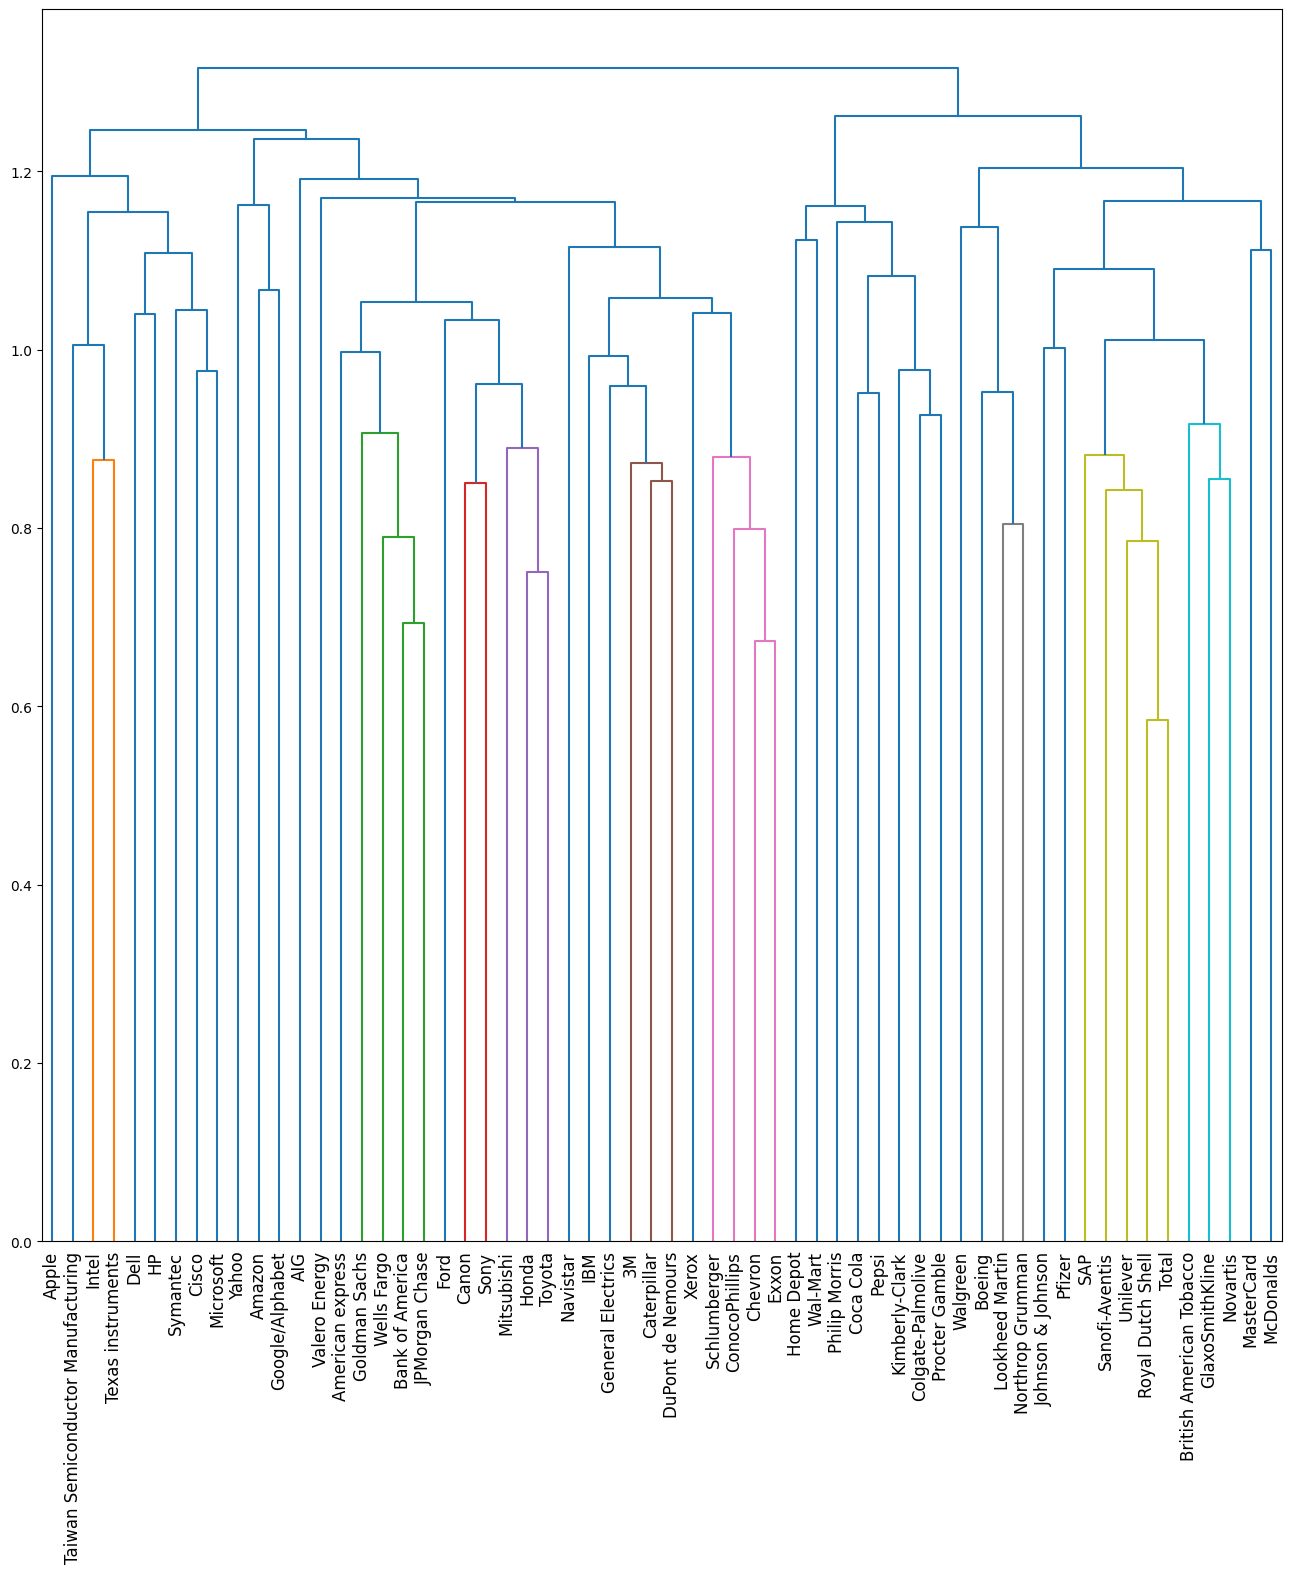

In [25]:
plt.figure(figsize=(16, 16))

dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=12
)

plt.show()